In [132]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

#--------------------------------------------

# There are multiple sheets in the excel file : 
data_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/KPMG_VI_New_raw_data_update_final.xlsx"



## CustomerDemographic

In [133]:
# CustomerDemographic
CustomerDemographic = pd.read_excel(data_path, sheet_name= "CustomerDemographic", header=1)

In [134]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [135]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [136]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

#### Primary Notes: 
1. `gender` column have inconsistencies
2. `job_title` have `NaN` values
3. `job_industry_category` have `NaN` values
4. `default` feature looks like mess 

In [137]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

### Gender 

In [138]:
CustomerDemographic['gender'].value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

Recommendation: We can replace Unknown genders by using customer names or we can replace with mode value of gender feature. i.e. 'Female'

In [139]:
gender_mapping = {'F': 'Female', 'Femal': 'Female', 'M': 'Male', 'U': 'Female'} # mapping 'U' as 'Female' because that is the mode
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace(gender_mapping)

CustomerDemographic['gender'].value_counts()

gender
Female    2127
Male      1873
Name: count, dtype: int64

In [140]:
# # For current Analysis let use drop rows with unknown genders
# CustomerDemographic = CustomerDemographic[CustomerDemographic['gender'] != 'U']

### DOB 

In [141]:

CustomerDemographic["DOB"].dtype # it is object data type, needs to be converted to datetime

dtype('O')

In [142]:
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])
print(CustomerDemographic["DOB"].dtype)

datetime64[ns]


In [143]:
# There are 87 missing values:
# Calculate the mean date
mean_date = CustomerDemographic['DOB'].mean()
print(mean_date)
# Fill missing values with the mean date
CustomerDemographic['DOB'].fillna(mean_date, inplace=True)

1977-07-12 23:56:41.277792


In [144]:
CustomerDemographic.sort_values(by= "DOB",ascending= True).head() # dude that never died???

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0


In [145]:
2023-1843 # 180 years old guy?

180

In [146]:
# for current analysis let us drop that dude from top of the dataframe LOL :)
CustomerDemographic = CustomerDemographic[CustomerDemographic['customer_id'] != 34]

### job_title 

There are 506 `NaN` values in this feature.

In [147]:
CustomerDemographic['job_title'].value_counts()

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

In [148]:
CustomerDemographic['job_title'].mode()

0    Business Systems Development Analyst
Name: job_title, dtype: object

In [149]:
job_title_mode = CustomerDemographic['job_title'].mode()[0]
print(job_title_mode)
CustomerDemographic['job_title'].fillna(job_title_mode, inplace=True)

Business Systems Development Analyst


In [150]:
# # let us drop nan values for current analysis:

# CustomerDemographic = CustomerDemographic[CustomerDemographic['job_title'].notnull()]

### job_industry_category

There are 656 `NaN` values in this feature.

In [151]:
CustomerDemographic['job_industry_category'].unique()


array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [152]:
job_industry_mode = CustomerDemographic['job_industry_category'].mode()[0]
print(job_industry_mode)
CustomerDemographic['job_industry_category'].fillna(job_industry_mode, inplace= True)

Manufacturing


In [153]:
# # let us drop value for both of the above values.
# CustomerDemographic = CustomerDemographic[CustomerDemographic['job_industry_category'].notnull()]

In [154]:
 
# CustomerDemographic['job_industry_category'].dropna(inplace=True)


# # CustomerDemographic['job_industry_category'] = CustomerDemographic['job_industry_category'].dropna()
# # CustomerDemographic['job_title']= CustomerDemographic['job_title'].dropna()


In [155]:

CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                301
owns_car                                 0
tenure                                  87
dtype: int64

In [156]:
# we can combine first name and last name together as full_name
CustomerDemographic['last_name'].fillna('', inplace=True) # considering those 85 null values

CustomerDemographic['full_name'] = CustomerDemographic['first_name'] + " " + CustomerDemographic['last_name']

In [157]:
CustomerDemographic['full_name']

0           Laraine Medendorp
1                 Eli Bockman
2                Arlin Dearle
3                     Talbot 
4       Sheila-kathryn Calton
                ...          
3995         Rosalia Halgarth
3996            Blanch Nisuis
3997           Sarene Woolley
3998               Patrizius 
3999            Kippy Oldland
Name: full_name, Length: 3999, dtype: object

In [158]:
# this makes first name and last name of no use to us:
# so let us drop these two
CustomerDemographic.drop(labels="first_name", axis=1, inplace=True)
CustomerDemographic.drop(labels="last_name", axis=1, inplace=True)

### default 

In [159]:
CustomerDemographic['default'].value_counts()

default
100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: count, Length: 90, dtype: int64

In [160]:
# This feature looks unnecessary, should be removed
CustomerDemographic.drop(labels="default", axis=1, inplace=True)

### owns_car  

In [161]:
CustomerDemographic['owns_car'].value_counts()

owns_car
Yes    2024
No     1975
Name: count, dtype: int64

In [162]:
# for consistency:
owns_car_maping = {'Yes':'Y', 'No': 'N' }
CustomerDemographic['owns_car'] = CustomerDemographic['owns_car'].replace(owns_car_maping, regex= True)
CustomerDemographic['owns_car'].value_counts()

owns_car
Y    2024
N    1975
Name: count, dtype: int64

### tenure 

In [163]:
mean_tenure = CustomerDemographic['tenure'].mean()

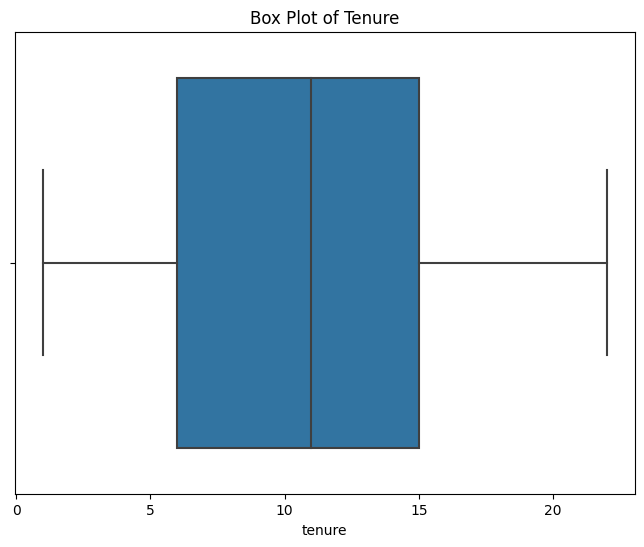

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize the distribution and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=CustomerDemographic['tenure'])
plt.title('Box Plot of Tenure')
plt.show()


There are no outliers so we can replace `nan` values with mean 

In [165]:
print(mean_tenure)
CustomerDemographic['tenure'] = CustomerDemographic['tenure'].fillna(mean_tenure)

10.65465235173824


### wealth_segment

In [166]:
CustomerDemographic['wealth_segment'].value_counts()

wealth_segment
Mass Customer        2000
High Net Worth       1021
Affluent Customer     978
Name: count, dtype: int64

In [167]:
CustomerDemographic.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
full_name                              0
dtype: int64

In [168]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   gender                               3999 non-null   object        
 2   past_3_years_bike_related_purchases  3999 non-null   int64         
 3   DOB                                  3999 non-null   datetime64[ns]
 4   job_title                            3999 non-null   object        
 5   job_industry_category                3999 non-null   object        
 6   wealth_segment                       3999 non-null   object        
 7   deceased_indicator                   3999 non-null   object        
 8   owns_car                             3999 non-null   object        
 9   tenure                               3999 non-null   float64       
 10  full_name        

-------------

## CustomerAddress

In [169]:
# CustomerAddress
CustomerAddress = pd.read_excel(data_path, sheet_name= "CustomerAddress", header= 1)



In [170]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [171]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


Awesome !!! It is clean data. 

---------------

## Transactions 

In [172]:
# Transactions
Transactions = pd.read_excel(data_path, sheet_name= "Transactions", header= 1)


In [173]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [174]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [175]:
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### online_order

In [176]:
Transactions['online_order'].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [177]:
Transactions = Transactions[Transactions['online_order'].notnull()]

In [178]:
# we can change values to boolean for online order 
Transactions['online_order'] = Transactions['online_order'].astype(bool)

In [179]:
Transactions['online_order'].value_counts()

online_order
True     9829
False    9811
Name: count, dtype: int64

### order_status 

In [180]:
Transactions['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [181]:
features = ['brand', 'product_line', 'product_class', 'product_size']

In [182]:
# Loop over features and print unique values
for feature in features:
    unique_values = Transactions[feature].unique()
    print(f"{feature}: {unique_values}")

brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class: ['medium' 'low' 'high' nan]
product_size: ['medium' 'large' 'small' nan]


In [183]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


Recommendations: We can replace `nan` with mode values for `product_class` and `product_size`.

Recommendation: We can drop these `197` rows because they have `nan` values for these 6 features.

In [184]:
# we will be dropping these values for now.
features = ['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']
Transactions = Transactions[~pd.isna(Transactions[features]).all(axis=1)] # any (OR), all (AND) , ~ (NOT) 
Transactions.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


Note: `customer_id` is common feature between all 4 sheets. 

In [185]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  bool          
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 non-nu

In [186]:
### Merging these 3 sheets in to single sheet a single table using customer_id

merged_df = pd.merge(CustomerDemographic, CustomerAddress, how='inner')
final_df = pd.merge(merged_df, Transactions, how='inner')

In [187]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19408 entries, 0 to 19407
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19408 non-null  int64         
 1   gender                               19408 non-null  object        
 2   past_3_years_bike_related_purchases  19408 non-null  int64         
 3   DOB                                  19408 non-null  datetime64[ns]
 4   job_title                            19408 non-null  object        
 5   job_industry_category                19408 non-null  object        
 6   wealth_segment                       19408 non-null  object        
 7   deceased_indicator                   19408 non-null  object        
 8   owns_car                             19408 non-null  object        
 9   tenure                               19408 non-null  float64       
 10  full_name 

In [188]:
final_df.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
full_name                              0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size    

In [189]:
file_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_old_customer_data.xlsx"
final_df.to_excel(file_path)

-------

## NewCustomerList

In [190]:
import pandas as pd
# NewCustomerList
NewCustomerList = pd.read_excel(data_path, sheet_name= "NewCustomerList", header= 1)

In [191]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [192]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [193]:
# unnamed?
NewCustomerList.iloc[0:5,16:21]
columns_to_drop = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']
NewCustomerList.drop(columns=columns_to_drop, inplace=True)

In [194]:
# we can combine first name and last name together as full_name
NewCustomerList['last_name'].fillna('', inplace=True) # considering those null values

NewCustomerList['full_name'] = NewCustomerList['first_name'] + " " + NewCustomerList['last_name']

In [195]:
# this makes first name and last name of no use to us:
# so let us drop these two
NewCustomerList.drop(labels="first_name", axis=1, inplace=True)
NewCustomerList.drop(labels="last_name", axis=1, inplace=True)

In [196]:
# dob
NewCustomerList["DOB"] = pd.to_datetime(NewCustomerList["DOB"])
print(NewCustomerList["DOB"].dtype)


DOB_mean = NewCustomerList['DOB'].mean()
print(DOB_mean)


NewCustomerList['DOB'].fillna(DOB_mean, inplace=True)

datetime64[ns]
1971-04-20 14:05:14.954221768


In [197]:
NewCustomerList.isnull().sum()

gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
full_name                                0
dtype: int64

In [198]:
job_title_mode = NewCustomerList['job_industry_category'].mode()[0]
print(job_title_mode)
NewCustomerList['job_industry_category'].fillna(job_title_mode, inplace=True)

Financial Services


In [199]:
job_title_mode = NewCustomerList['job_title'].mode()[0]
print(job_title_mode)
NewCustomerList['job_title'].fillna(job_title_mode, inplace=True)

Associate Professor


In [200]:
# # let us drop nall values
# NewCustomerList.dropna(subset=['DOB', 'job_title', 'job_industry_category'], inplace=True)

In [201]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               1000 non-null   object        
 1   past_3_years_bike_related_purchases  1000 non-null   int64         
 2   DOB                                  1000 non-null   datetime64[ns]
 3   job_title                            1000 non-null   object        
 4   job_industry_category                1000 non-null   object        
 5   wealth_segment                       1000 non-null   object        
 6   deceased_indicator                   1000 non-null   object        
 7   owns_car                             1000 non-null   object        
 8   tenure                               1000 non-null   int64         
 9   address                              1000 non-null   object        
 10  postcode     

In [202]:
NewCustomerList['gender'].value_counts()

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

In [203]:
gender_mapping = { 'U': 'Female'} # mapping 'U' as 'Female' because that is the mode
NewCustomerList['gender'] = NewCustomerList['gender'].replace(gender_mapping)

NewCustomerList['gender'].value_counts()

gender
Female    530
Male      470
Name: count, dtype: int64

In [204]:
file_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_new_customer_data.xlsx"
NewCustomerList.to_excel(file_path)

--------------

### Aditional Data

https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026

In [2]:
import pandas as pd

df = pd.read_csv("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/ASGS.csv")

df

,Expected release dates
Section of the ASGS,Expected release
Main Structure and Greater Capital City Statistical Areas,July 2021
Indigenous Structure,October 2021
Non ABS Structures,October 2021
"Significant Urban Areas, Urban Centres and Localities, Section of State",October 2022
Remoteness Structure,March 2023
"Source: Australian Bureau of Statistics, Australian Statistical Geography Standard (ASGS) Edition 3 July 2021 - June 2026",NaN
